In [2]:
#Exploring the files created by Helen Seroussi for ISMIP6, as part of CMIP6 hackathon paper
#Author S Buzzard 
#Last modified 30/09/21

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from pathlib import Path


#SMB files are in kg/s, total files are in Gt
#Convert SMB- multiply by 31536000 (seconds in a yr), divide by 1000000000000 (kg in a Gt)? (=mutiply by .000031536)
#No data for ILTS_PIK_SICOPOLIS1, VUB_AISMPALEO

#TODO:
#Check these units for SMB, it results in dynamic being way more important than initially suspected
#Match up experiments to ssps- convert to temperature changes to plot response to temp change vs temp change. Currently there is some pseudo data in place for temperature
#SMB files are out by half a year (won't impact but need to fix)
#Check sign for SMB should it be negative? Is dyn then ok as is?

#To think about:
#Why do some runs have different values at 2015?
#How does dynamic loss equate to grounded vs non-grounded ice?
#Presenting these as mmSLE masks the fact that not all models start at zero (doesn't change trend but worth remembering)

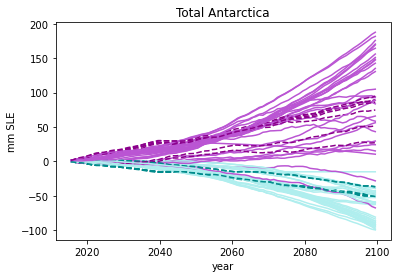

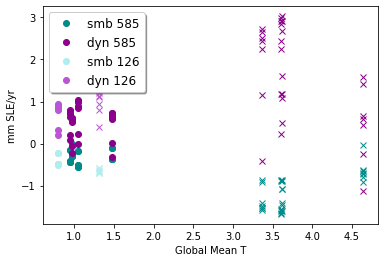

In [55]:
#Total Antarctica- all models
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]
smb_585_rate=[]
dyn_585_rate=[]
smb_126_rate=[]
dyn_126_rate=[]

#Average temps by experiment number
exp_avg_temp_2050=[0.949585,0.796631,1.46893,1.04221,0.971954,0.949585,0.796631,1.46893,1.04221,0.971954]
exp_avg_temp_2100=[3.60321,1.30756,4.63235,3.61523,3.37021,3.60321,1.30756,4.63235,3.61523,3.37021]

for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361#If SMB is -ve thats a +ve SLR contribution
                smb_585_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_585.append(smb_cum)
               

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_585.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_585_rate.append(dyn_rate)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,color='paleturquoise')
                plt.plot(time,dyn_cum,color='mediumorchid')
                
                
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361
                smb_126_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_126.append(smb_cum)

   

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_126.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_126_rate.append(dyn_rate)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,'--',color='darkcyan')
                plt.plot(time,dyn_cum,'--',color='darkmagenta')
                
plt.title('Total Antarctica')
plt.ylabel('mm SLE')
plt.xlabel('year')
plt.savefig('Whole_AA_timeseries.jpg')
plt.show()

#Average rate of change for 2050 and for 2100 vs Temperature 

smb_585_mean_2050=[]
smb_585_mean_2100=[]
smb_126_mean_2050=[]
smb_126_mean_2100=[]
dyn_585_mean_2050=[]
dyn_585_mean_2100=[]
dyn_126_mean_2050=[]
dyn_126_mean_2100=[]

for i in range (len(smb_585)):
    smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
    smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
    dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
    dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
for i in range (len(smb_126)):
    smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
    smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
    dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
    dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))
    
    
plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
plt.ylabel('mm SLE/yr')
plt.xlabel('Global Mean T')
plt.savefig('SLRvT_AllAa.jpg')
plt.legend(loc='upper left', shadow=True, fontsize='large')
    
plt.show()






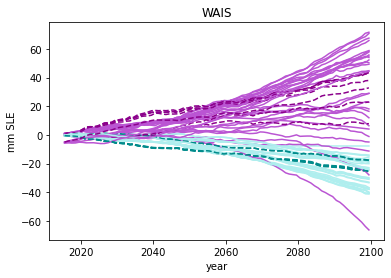

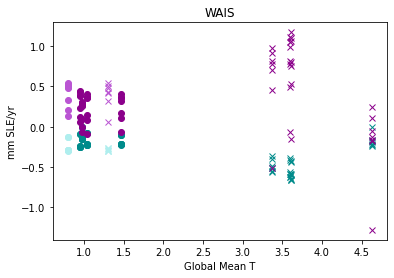

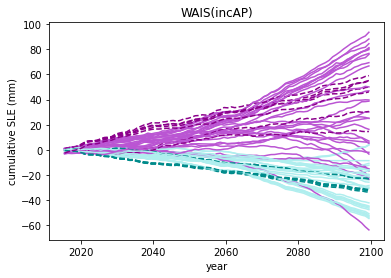

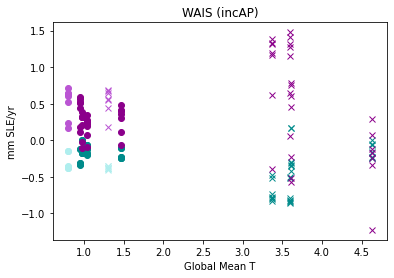

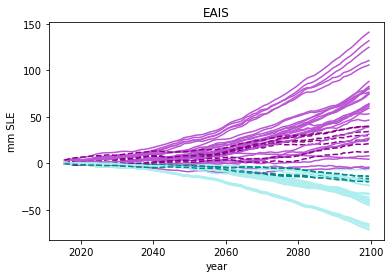

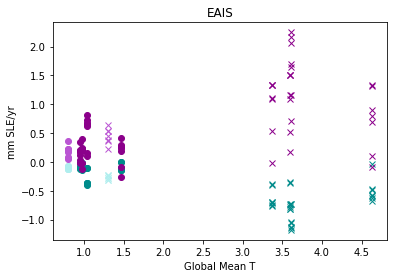

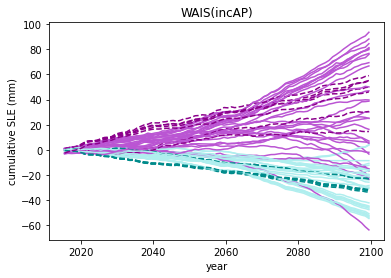

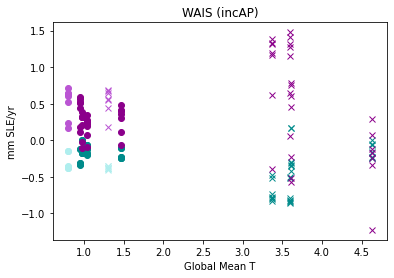

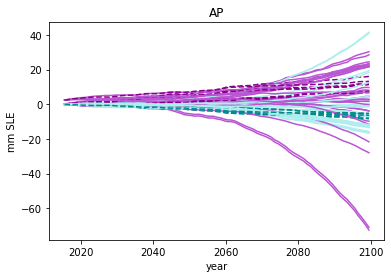

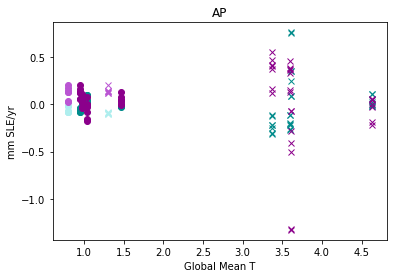

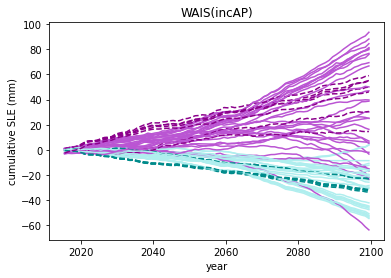

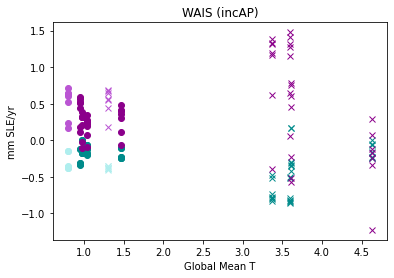

In [60]:
#By regions- all models
#Region 1 is WAIS, 2 is EAIS and 3 is AP
region_names=['WAIS','EAIS','AP']
for region in range(1,4):
    smb_585=[]
    dyn_585=[]
    smb_126=[]
    dyn_126=[]
    temp_585_2050=[]
    temp_585_2100=[]
    temp_126_2050=[]
    temp_126_2100=[]
    smb_585_rate=[]
    dyn_585_rate=[]
    smb_126_rate=[]
    dyn_126_rate=[]
    for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_585_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_585.append(smb_cum)




                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=(ds['limnsw_region_'+str(region)][:85]/361)-smb_cum
                    dyn_585.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_585_rate.append(dyn_rate)

                    temp_585_2050.append(exp_avg_temp_2050[exp-1])
                    temp_585_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,color='paleturquoise')
                    plt.plot(time,dyn_cum,color='mediumorchid')
            
                    
            for exp in (2,7):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-(ds['smb_region_'+str(region)][:85]*.000031536)/361
                    smb_126_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_126.append(smb_cum)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=(ds['limnsw_region_'+str(region)][:85]/361)-smb_cum
                    dyn_126.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_126_rate.append(dyn_rate)
                    
                    temp_126_2050.append(exp_avg_temp_2050[exp-1])
                    temp_126_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,'--',color='darkcyan')
                    plt.plot(time,dyn_cum,'--',color='darkmagenta')

    plt.title(region_names[region-1])
    plt.ylabel('mm SLE')
    plt.xlabel('year')
    plt.savefig('Timeseries_'+region_names[region-1]+'.jpg')
    plt.show()
    
                #Average rate of change for 2050 and for 2100 vs Temperature 

    smb_585_mean_2050=[]
    smb_585_mean_2100=[]
    smb_126_mean_2050=[]
    smb_126_mean_2100=[]
    dyn_585_mean_2050=[]
    dyn_585_mean_2100=[]
    dyn_126_mean_2050=[]
    dyn_126_mean_2100=[]

    for i in range (len(smb_585)):
        smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
        smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
        dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
        dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
    for i in range (len(smb_126)):
        smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
        smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
        dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
        dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))


    plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
    plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
    plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
    plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
    plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
    plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
    plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
    plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
    plt.ylabel('mm SLE/yr')
    plt.title(region_names[region-1])
    plt.xlabel('Global Mean T')
    plt.savefig('SLRvT_'+region_names[region-1]+'.jpg')
    #plt.legend(loc='upper left', shadow=True, fontsize='large')

    plt.show()
    
#Combining WAIS and AP (regions 1 and 3)
    
    smb_585=[]
    dyn_585=[]
    smb_126=[]
    dyn_126=[]
    temp_585_2050=[]
    temp_585_2100=[]
    temp_126_2050=[]
    temp_126_2100=[]
    smb_585_rate=[]
    dyn_585_rate=[]
    smb_126_rate=[]
    dyn_126_rate=[]
    for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
            for exp in (1,3,4,5,6,8,9,10):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-((ds['smb_region_1'][:85]+ds['smb_region_3'][:85])*.000031536)/361
                    smb_585_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_585.append(smb_cum)




                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=((ds['limnsw_region_1'][:85]+ds['limnsw_region_3'][:85])/361)-smb_cum
                    dyn_585.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_585_rate.append(dyn_rate)

                    temp_585_2050.append(exp_avg_temp_2050[exp-1])
                    temp_585_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,color='paleturquoise')
                    plt.plot(time,dyn_cum,color='mediumorchid')
            
                    
            for exp in (2,7):
                #import SMB files
                fp='SMB_ISMIP6/'
                smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                if smb_file.is_file():
                    ds=nc.Dataset(smb_file)
                    time=ds['time'][:85]
                    smb_rate=-((ds['smb_region_1'][:85]+ds['smb_region_3'][:85])*.000031536)/361
                    smb_126_rate.append(smb_rate)
                    smb_cum=np.zeros(len(smb_rate))
                    smb_cum[0]=smb_rate[0]
                    for i in range(len(smb_rate)-1):
                        smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                    smb_126.append(smb_cum)

                    #import dynamic
                    fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                    ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                    dyn_cum=((ds['limnsw_region_1'][:85]+ds['limnsw_region_3'][:85])/361)-smb_cum
                    dyn_126.append(dyn_cum)
                    dyn_rate=np.zeros(len(dyn_cum))
                    dyn_rate[0]=dyn_cum[0]
                    for i in range(len(dyn_rate)-1):
                        dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                    dyn_126_rate.append(dyn_rate)
                    
                    temp_126_2050.append(exp_avg_temp_2050[exp-1])
                    temp_126_2100.append(exp_avg_temp_2100[exp-1])
                    plt.plot(time,smb_cum,'--',color='darkcyan')
                    plt.plot(time,dyn_cum,'--',color='darkmagenta')

    plt.title('WAIS(incAP)')
    plt.ylabel('cumulative SLE (mm)')
    plt.xlabel('year')
    plt.savefig('Timeseries_WAIS(incAP).jpg')
    plt.show()
    
                #Average rate of change for 2050 and for 2100 vs Temperature 

    smb_585_mean_2050=[]
    smb_585_mean_2100=[]
    smb_126_mean_2050=[]
    smb_126_mean_2100=[]
    dyn_585_mean_2050=[]
    dyn_585_mean_2100=[]
    dyn_126_mean_2050=[]
    dyn_126_mean_2100=[]

    for i in range (len(smb_585)):
        smb_585_mean_2050.append(np.average(smb_585_rate[i][:35]))
        smb_585_mean_2100.append(np.average(smb_585_rate[i][35:]))
        dyn_585_mean_2050.append(np.average(dyn_585_rate[i][:35]))
        dyn_585_mean_2100.append(np.average(dyn_585_rate[i][35:]))   
    for i in range (len(smb_126)):
        smb_126_mean_2050.append(np.average(smb_126_rate[i][:35]))
        smb_126_mean_2100.append(np.average(smb_126_rate[i][35:]))
        dyn_126_mean_2050.append(np.average(dyn_126_rate[i][:35]))
        dyn_126_mean_2100.append(np.average(dyn_126_rate[i][35:]))


    plt.plot(temp_585_2050,smb_585_mean_2050,'o',color='darkcyan', label='smb 585')
    plt.plot(temp_585_2100,smb_585_mean_2100,'x',color='darkcyan')
    plt.plot(temp_585_2050,dyn_585_mean_2050,'o',color='darkmagenta', label='dyn 585')
    plt.plot(temp_585_2100,dyn_585_mean_2100,'x',color='darkmagenta')
    plt.plot(temp_126_2050,smb_126_mean_2050,'o',color='paleturquoise', label='smb 126')
    plt.plot(temp_126_2100,smb_126_mean_2100,'x',color='paleturquoise')
    plt.plot(temp_126_2050,dyn_126_mean_2050,'o',color='mediumorchid', label='dyn 126')
    plt.plot(temp_126_2100,dyn_126_mean_2100,'x',color='mediumorchid')
    plt.ylabel('mm SLE/yr')
    plt.title('WAIS (incAP)')
    plt.xlabel('Global Mean T')
    plt.savefig('SLRvT_WAIS(incAP).jpg')

    plt.show()


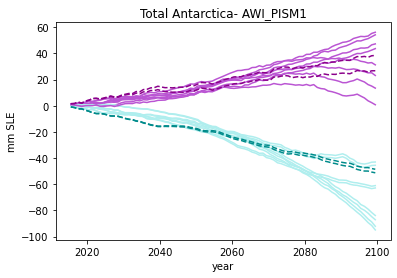

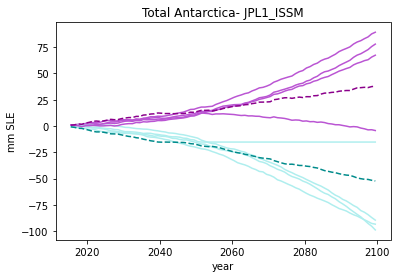

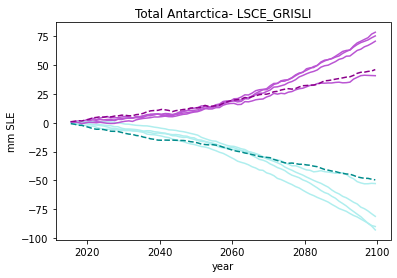

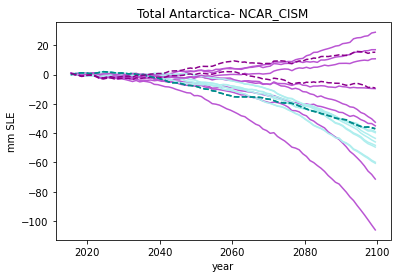

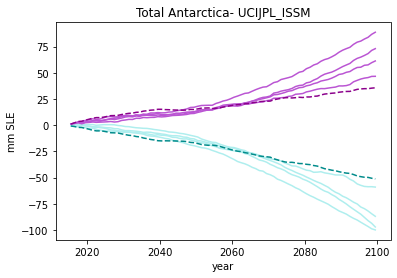

In [54]:
#Total Antarctica- by model
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]
smb_585_rate=[]
dyn_585_rate=[]
smb_126_rate=[]
dyn_126_rate=[]

#Average temps by experiment number
exp_avg_temp_2050=[0.949585,0.796631,1.46893,1.04221,0.971954,0.949585,0.796631,1.46893,1.04221,0.971954]
exp_avg_temp_2100=[3.60321,1.30756,4.63235,3.61523,3.37021,3.60321,1.30756,4.63235,3.61523,3.37021]

for model in ('AWI_PISM1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361#If SMB is -ve thats a +ve SLR contribution
                smb_585_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_585.append(smb_cum)
               

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_585.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_585_rate.append(dyn_rate)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,color='paleturquoise')
                plt.plot(time,dyn_cum,color='mediumorchid')
                
                
            
                
        for exp in (2,7):
            #import SMB files
            fp='SMB_ISMIP6/'
            smb_file=Path(fp+'computed_smb_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            
            if smb_file.is_file():
                ds=nc.Dataset(smb_file)
                time=ds['time'][:85]
                smb_rate=-(ds['smb'][:85]*.000031536)/361
                smb_126_rate.append(smb_rate)
                smb_cum=np.zeros(len(smb_rate))
                smb_cum[0]=smb_rate[0]
                for i in range(len(smb_rate)-1):
                    smb_cum[i+1]=smb_cum[i]+smb_rate[i+1]
                smb_126.append(smb_cum)

   

                #import dynamic
                fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'
                ds=nc.Dataset(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
                dyn_cum=(ds['limnsw_total_antarctica'][:85]/361)-smb_cum
                dyn_126.append(dyn_cum)
                dyn_rate=np.zeros(len(dyn_cum))
                dyn_rate[0]=dyn_cum[0]
                for i in range(len(dyn_rate)-1):
                    dyn_rate[i+1]=dyn_cum[i+1]-dyn_cum[i]
                dyn_126_rate.append(dyn_rate)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                plt.plot(time,smb_cum,'--',color='darkcyan')
                plt.plot(time,dyn_cum,'--',color='darkmagenta')
                
        plt.title('Total Antarctica- '+model)
        plt.ylabel('mm SLE')
        plt.xlabel('year')
        plt.show()



In [59]:
#Experiments used
# AWI_PISM1_expB1
# AWI_PISM1_expB3
# AWI_PISM1_expB4
# AWI_PISM1_expB5
# AWI_PISM1_expB6
# AWI_PISM1_expB8
# AWI_PISM1_expB9
# AWI_PISM1_expB10
# JPL1_ISSM_expB6
# JPL1_ISSM_expB8
# JPL1_ISSM_expB9
# JPL1_ISSM_expB10
# LSCE_GRISLI_expB6
# LSCE_GRISLI_expB8
# LSCE_GRISLI_expB9
# LSCE_GRISLI_expB10
# NCAR_CISM_expB1
# NCAR_CISM_expB3
# NCAR_CISM_expB4
# NCAR_CISM_expB5
# NCAR_CISM_expB6
# NCAR_CISM_expB8
# NCAR_CISM_expB9
# NCAR_CISM_expB10
# UCIJPL_ISSM_expB6
# UCIJPL_ISSM_expB8
# UCIJPL_ISSM_expB9
# UCIJPL_ISSM_expB10

<ipython-input-67-9934aa5d12a0>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time=ds['time'][:85]/360
<ipython-input-67-9934aa5d12a0>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  smb=-(ds['smb'][:85]*.000031536)/361
<ipython-input-67-9934aa5d12a0>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence t

<ipython-input-67-9934aa5d12a0>:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dyn=(-ds['sle'][:85]*1000)-smb
<ipython-input-67-9934aa5d12a0>:33: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  dyn=(-ds['sle'][:85]*1000)-smb
<ipython-input-67-9934aa5d12a0>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

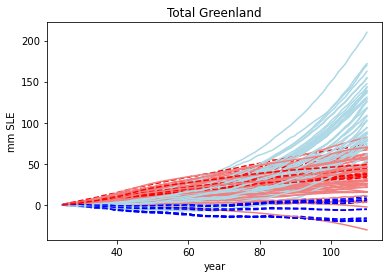

In [67]:
#Total Greenland- all models
#SMB included in GRL paper files
#Dynamic in *m* SLE already
#Time here is in days since 2015, or days since 1980, with a 360 or a 365 day calendar...
smb_585=[]
dyn_585=[]
smb_126=[]
dyn_126=[]
temp_585_2050=[]
temp_585_2100=[]
temp_126_2050=[]
temp_126_2100=[]

time=ds['time'][:85]/360

#Average temps by experiment number
exp_avg_temp_2050=[0.949585,0.796631,1.46893,1.04221,0.971954,0.949585,0.796631,1.46893,1.04221,0.971954]
exp_avg_temp_2100=[3.60321,1.30756,4.63235,3.61523,3.37021,3.60321,1.30756,4.63235,3.61523,3.37021]

for model in ('AWI_ISSM1','AWI_ISSM2','AWI_ISSM3','BGC_BISICLES','GSFC_ISSM','ILTS_PIK_SICOPOLIS2','ILTS_PIK_SICOPOLIS3','IMAU_IMAUICE2','JPL_ISSM','JPL_ISSMPALEO','LSCE_GRISLI2','NCAR_CISM','UAF_PISM1','UAF_PISM2','UCIJPL_ISSM1','VUB_GISMHOMv1'):
        for exp in (1,3,4,5,6,8,9,10):
            #import SMB files
            fp='project01_main/data/raw_data/GRL_paper_data/GrIS/Ice/'
            file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb'+f"{exp:02}"+'.nc')
            if file.is_file():
                ds=nc.Dataset(file)
                #time=ds['time'][:85]/360
                smb=-(ds['smb'][:85]*.000031536)/361
                for i in range(len(smb)-1):
                    smb[i+1]=smb[i]+smb[i+1]
                smb_585.append(smb)

                dyn=(-ds['sle'][:85]*1000)-smb
                dyn_585.append(dyn)
                
                temp_585_2050.append(exp_avg_temp_2050[exp-1])
                temp_585_2100.append(exp_avg_temp_2100[exp-1])
                
                plt.plot(time,smb,'lightblue')
                plt.plot(time,dyn,'lightcoral')
            
                
        for exp in (2,7):
            #import SMB files
            fp='project01_main/data/raw_data/GRL_paper_data/GrIS/Ice/'
            file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb'+f"{exp:02}"+'.nc')
            if file.is_file():
                ds=nc.Dataset(file)
                #time=ds['time'][:85]/360
                smb=-(ds['smb'][:85]*.000031536)/361
                for i in range(len(smb)-1):
                    smb[i+1]=smb[i]+smb[i+1]
                smb_126.append(smb)

                dyn=(-ds['sle'][:85]*1000)-smb
                dyn_126.append(dyn)
                
                temp_126_2050.append(exp_avg_temp_2050[exp-1])
                temp_126_2100.append(exp_avg_temp_2100[exp-1])
                #ssp_scenario.append(126)
                
                plt.plot(time,smb,'b--')
                plt.plot(time,dyn,'r--')
            
                
#plt.plot(time,np.average(smb_585, axis=0),'k')
#plt.plot(time,np.average(dyn_585, axis=0),'k')
#plt.plot(time,np.average(smb_126, axis=0),'k--')
#plt.plot(time,np.average(dyn_126, axis=0),'k--')
plt.title('Total Greenland')
plt.ylabel('mm SLE')
plt.xlabel('year')
plt.show()



